In [ ]:
# Reference: https://github.com/fengdu78/Coursera-ML-AndrewNg-Notes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report

In [2]:
from google.colab import files
import io

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ex3data1 = sio.loadmat('/content/drive/My Drive/AndrewNg-ML/ex3data1.mat')
ex3weights = sio.loadmat('/content/drive/My Drive/AndrewNg-ML/ex3weights.mat')

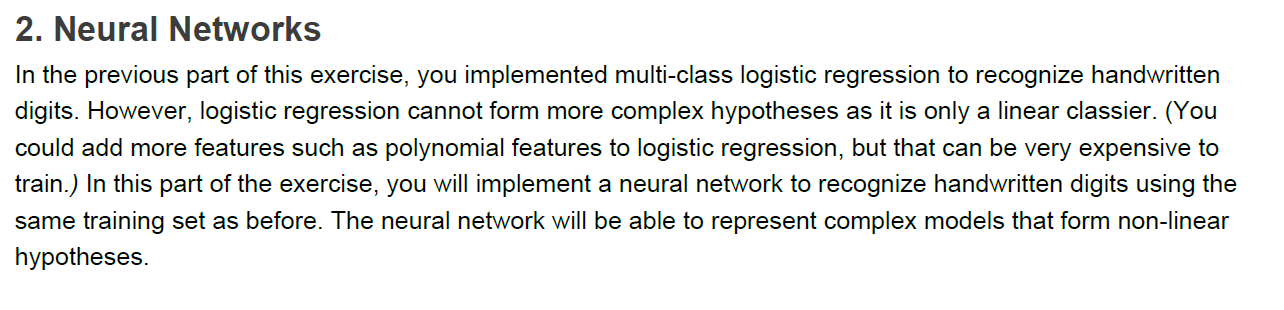

In [5]:
def load_weight(data):
    return data['Theta1'], data['Theta2']

In [6]:
def load_data(data, transpose=True):
    y = data.get('y')  # (5000,1)
    y = y.reshape(y.shape[0])  # make it back to column vector

    X = data.get('X')  # (5000,400)

    if transpose:
        # for this dataset, you need a transpose to get the orientation right
        X = np.array([image.reshape((20, 20)).T for image in X])

        # and I flat the image again to preserve the vector presentation
        X = np.array([image.reshape(400) for image in X])

    return X, y

In [7]:
theta1, theta2 = load_weight(ex3weights)
theta1.shape, theta2.shape

((25, 401), (10, 26))

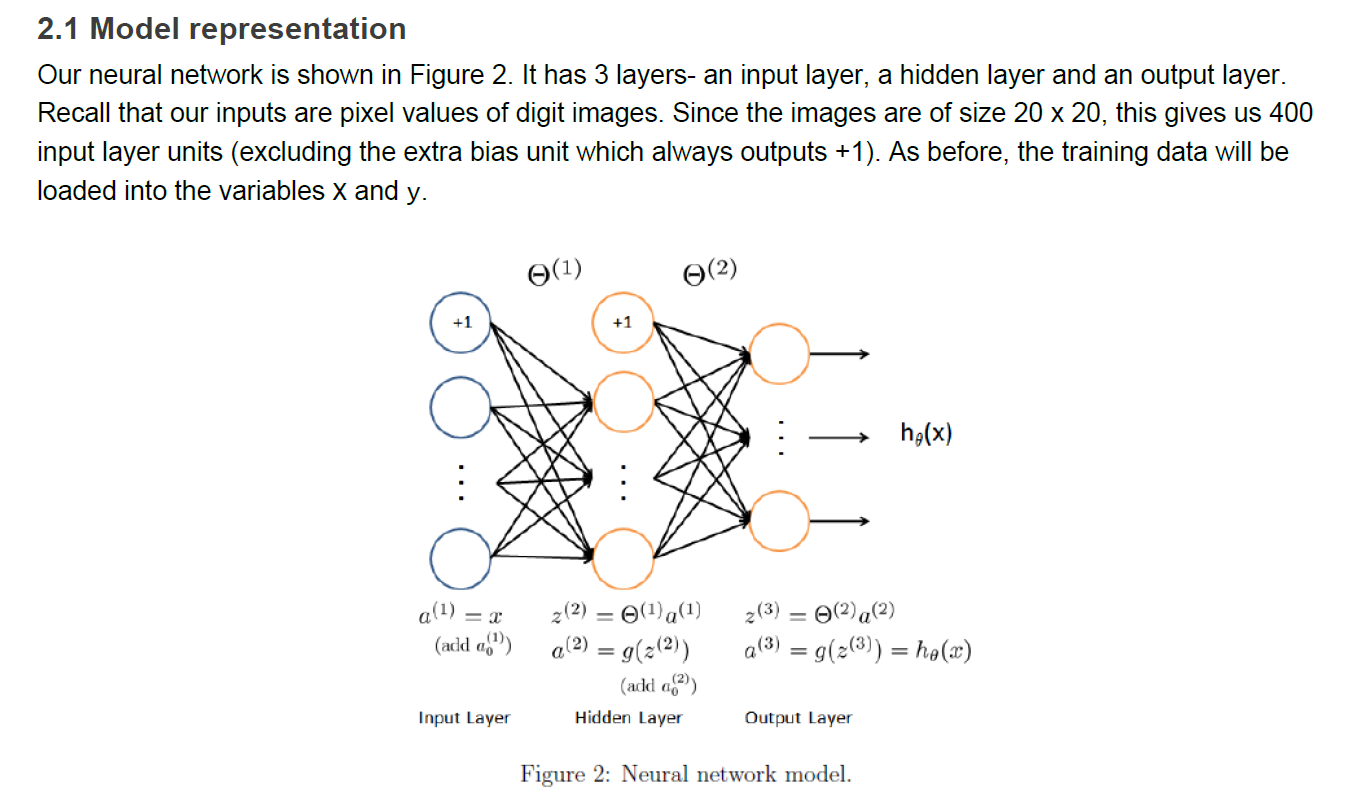

In [8]:
X, y = load_data(ex3data1, transpose=False)

X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1) 

X.shape, y.shape

((5000, 401), (5000,))

In [9]:
a1 = X

In [10]:
z2 = np.dot(a1, theta1.T) # (5000, 401) @ (25,401).T = (5000, 25)
z2.shape

(5000, 25)

In [11]:
z2 = np.insert(z2, 0, values=np.ones(z2.shape[0]), axis=1)

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
a2 = sigmoid(z2)
a2.shape

(5000, 26)

In [14]:
z3 = np.dot(a2, theta2.T)
z3.shape

(5000, 10)

In [15]:
a3 = sigmoid(z3)
a3

array([[1.38245045e-04, 2.05540079e-03, 3.04012453e-03, ...,
        4.91017499e-04, 7.74325818e-03, 9.96229459e-01],
       [5.87756717e-04, 2.85026516e-03, 4.14687943e-03, ...,
        2.92311247e-03, 2.35616705e-03, 9.96196668e-01],
       [1.08683616e-04, 3.82659802e-03, 3.05855129e-02, ...,
        7.51453949e-02, 6.57039547e-03, 9.35862781e-01],
       ...,
       [6.27824726e-02, 4.50406476e-03, 3.54510925e-02, ...,
        2.63669734e-03, 6.89448164e-01, 2.74369466e-05],
       [1.01908736e-03, 7.34360211e-04, 3.78558700e-04, ...,
        1.45616578e-02, 9.75989758e-01, 2.33374461e-04],
       [5.90807037e-05, 5.41717668e-04, 2.58968308e-05, ...,
        7.00508308e-03, 7.32814653e-01, 9.16696059e-02]])

In [16]:
y_pred = np.argmax(a3, axis=1) + 1  # numpy is 0 base index, +1 for matlab convention
y_pred.shape

(5000,)

In [17]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       500
           2       0.98      0.97      0.97       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.98      0.98      0.98       500
           6       0.97      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

